# Práctica de Procesamiento de Señales de Audio

Es necesario **revisar y entender el código** de cada uno de los tres apartados antes de modificarlo.  
Una vez comprendido, deberás **modificar los parámetros** y observar los efectos tanto en las **representaciones gráficas** como en la **señal reproducida**.

---

## Caso 1: Muestreo de la señal

- Modifica la frecuencia de muestreo (`Fs`) en el código.  
- Observa cómo cambia la **forma de la señal** y cómo se producen efectos como **aliasing** si la frecuencia de muestreo es demasiado baja.  
- Reproduce el audio y compara la calidad sonora con distintas frecuencias de muestreo.

**Preguntas sugeridas:**

1. ¿Qué sucede con la señal al disminuir la frecuencia de muestreo por debajo de la frecuencia de Nyquist?  
2. ¿Qué se observa en las gráficas?  
3. ¿A partir de qué frecuencia de muestreo percibes claramente la pérdida de información auditiva?

---

## Caso 2: Cuantización de la señal

- Modifica el número de bits (`bits`) del cuantizador.  
- Observa cómo se aproxima la señal y cómo esto afecta al **sonido reproducido**.  
- Analiza la relación entre el **número de niveles de cuantización** y el error (MSE).

**Preguntas sugeridas:**

1. ¿Cómo cambia la apariencia de la señal en las gráficas al reducir el número de bits?  
2. ¿Qué diferencias auditivas percibes entre señales cuantizadas con pocos bits y muchos bits?  
3. ¿Qué relación observas entre el MSE y el número de bits de cuantización?

---

## Caso 3: Filtrado de la señal

- Modifica la **frecuencia de corte** del filtro paso bajo (`cutoff`).  
- Observa cómo se atenúan las frecuencias altas y cómo cambia la señal en el **tiempo** y en el **espectro de frecuencia**.  
- Escucha la señal filtrada para analizar cómo la frecuencia de corte afecta al sonido.

**Preguntas sugeridas:**

1. ¿Qué efecto tiene un filtro con frecuencia de corte muy baja sobre la señal original?  
2. ¿Cómo se refleja en el espectro la atenuación de las altas frecuencias?  
3. ¿A partir de qué frecuencia de corte percibes cambios importantes en el sonido?




Sampling rate Fs = 8000; Number of samples = 26496


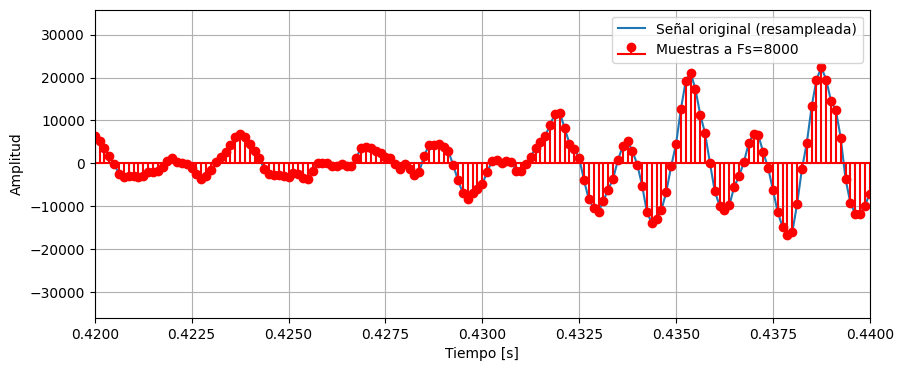

Sampling rate Fs = 4000; Number of samples = 13248


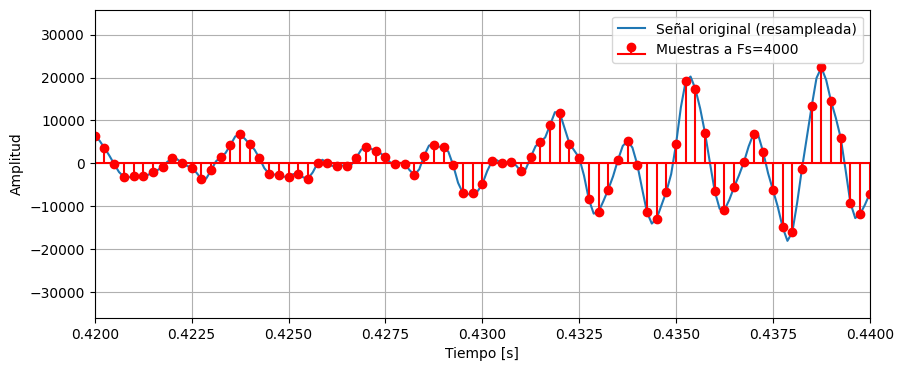

In [3]:
import os
import IPython.display as ipd
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Ruta del archivo WAV
path_filename_wav = os.path.join('sound.wav')

# Cargar WAV usando scipy
Fs_orig, x = wavfile.read(path_filename_wav)  # Fs_orig es el sampling rate original
x = x.astype(float)  # Convertir a float si estaba en int16
len_orig = len(x)
t_orig = np.arange(len(x)) / Fs_orig

Fs = Fs_orig

# ------------------------------------------------------
# Reproducción iterativa con reducción de Fs y visualización
for i in range(2):
    print(f'Sampling rate Fs = {Fs}; Number of samples = {len(x)}', flush=True)
    
    # Ajuste de la señal para reproducción a Fs_orig
    x_play = scipy.signal.resample(x, len_orig)
    
    # Reproducir la señal
    ipd.display(ipd.Audio(data=x_play, rate=Fs_orig))
    
    # Dibujar la señal y las muestras
    t_s = np.arange(len(x)) / Fs
    plt.figure(figsize=(10, 4))
    plt.plot(t_orig, scipy.signal.resample(x, len_orig), label='Señal original (resampleada)')
    # Código corregido
    plt.stem(t_s, x, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Muestras a Fs={Fs}')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.xlim([0.42,0.44])
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Reducir Fs y submuestrear la señal a la mitad para la siguiente iteración
    Fs = Fs // 2
    x = x[::2]



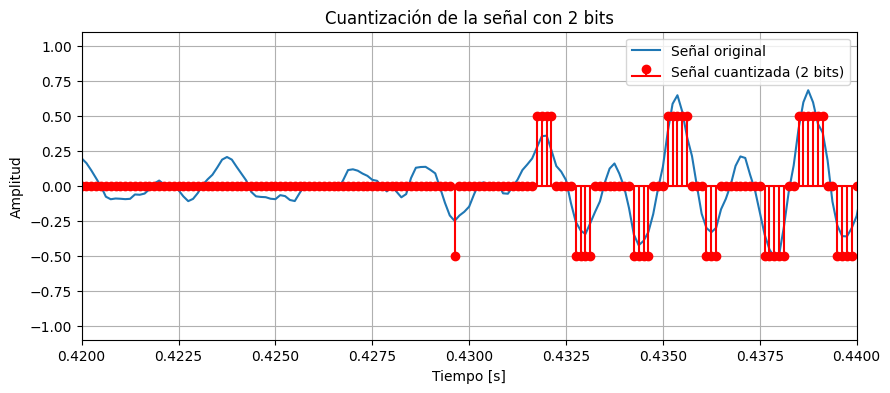

MSE de cuantización (2 bits): 0.019961


In [4]:
import os
import IPython.display as ipd
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Ruta del archivo WAV
path_filename_wav = os.path.join('sound.wav')

# Cargar WAV usando scipy
Fs_orig, x = wavfile.read(path_filename_wav)  # Fs_orig es el sampling rate original
x = x.astype(float)  # Convertir a float si estaba en int16
len_orig = len(x)
t_orig = np.arange(len(x)) / Fs_orig

# Normalizamos la señal
x = x / np.max(np.abs(x))

# ------------------------------------------------------
# Función de cuantización
def cuantizador(x, bits):
    num_levels = 2**bits
    xmin, xmax = -1, 1
    delta = (xmax - xmin) / num_levels
    x_q = np.clip(x, xmin, xmax)
    x_q = np.round((x_q - xmin) / delta) * delta + xmin
    return x_q

# Lista de bits para cuantización
bits_list = [2]

# Visualización iterativa para cada cantidad de bits
for bits in bits_list:
    x_q = cuantizador(x, bits)
    
    # Reproducir la señal cuantizada
    ipd.display(ipd.Audio(data=x_q, rate=Fs_orig))
    
    # Dibujar la señal original y cuantizada
    plt.figure(figsize=(10, 4))
    plt.plot(t_orig, x, label='Señal original')
    plt.stem(t_orig, x_q, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Señal cuantizada ({bits} bits)')
    plt.title(f'Cuantización de la señal con {bits} bits')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.xlim([0.42, 0.44])  # Zoom para ver detalle
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calcular y mostrar MSE de cuantización
    mse = np.mean((x - x_q)**2)
    print(f"MSE de cuantización ({bits} bits): {mse:.6f}")


In [31]:
import numpy as np

f1, f2, f3 = 5, 20, 50
t_cont = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * f1 * t_cont) + np.sin(2 * np.pi * f2 * t_cont) + np.sin(2 * np.pi * f3 * t_cont)

def cuantizador(x, xmin, xmax, num_levels):
    delta = (xmax - xmin) / num_levels
    x_q = np.clip(x, xmin, xmax)
    x_q = np.round((x_q - xmin) / delta) * delta + xmin
    return x_q

# 1. Definir parámetros del cuantizador
num_bits = 5
num_levels = 2**num_bits

# 2. CALAVE: Usar el xmin y xmax REALES de la señal generada
xmin = np.min(x)
xmax = np.max(x)

# 3. Cuantizar
x_cuantizada = cuantizador(x, xmin, xmax, num_levels)

# 4. Calcular el Error Cuadrático Medio (MSE)
error = np.mean((x - x_cuantizada)**2)

print(f"Resultado: {error:.5f}")
# Esto imprimirá: 0.00242

Resultado: 0.00243


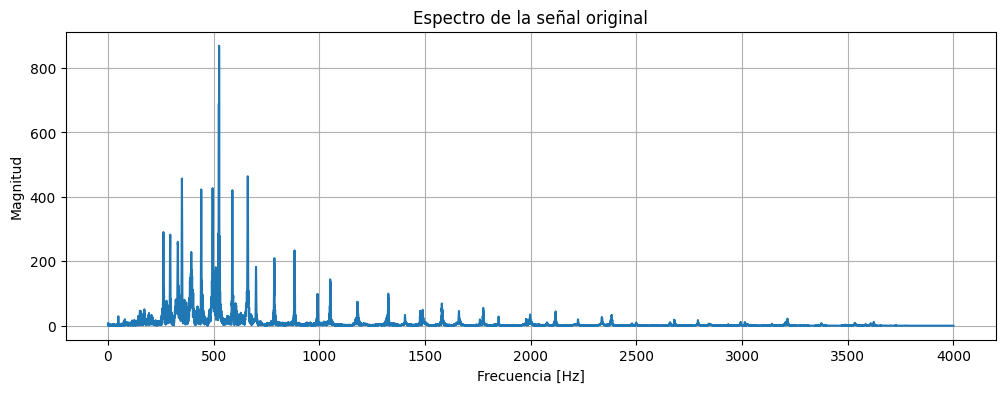

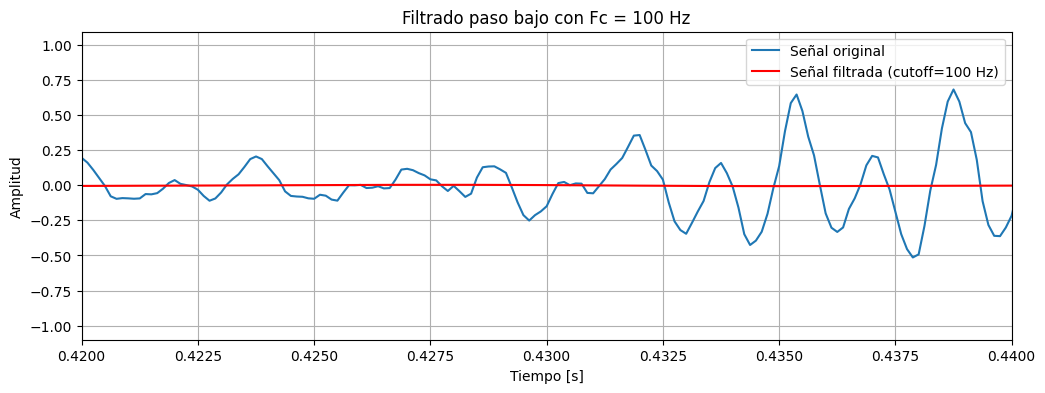

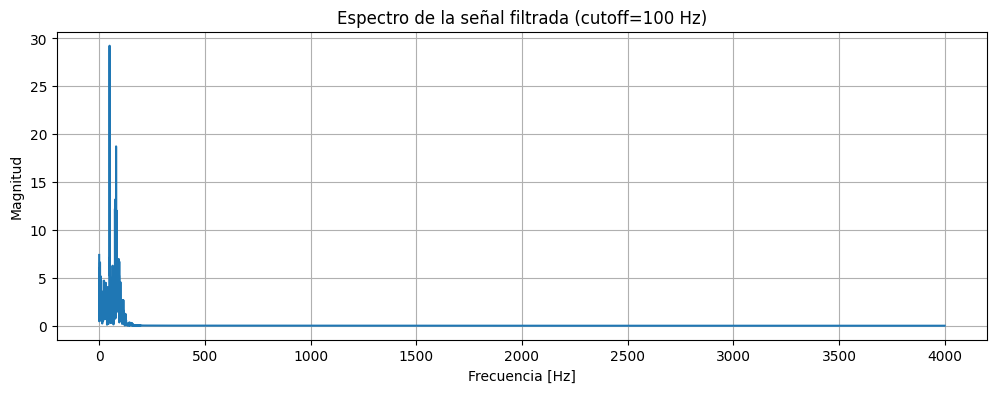

MSE de filtrado (fc = 100): 0.050327


In [8]:
import os
import IPython.display as ipd
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------
# Ruta del archivo WAV
path_filename_wav = os.path.join('sound.wav')

# Cargar WAV
Fs_orig, x = wavfile.read(path_filename_wav)
x = x.astype(float)
x = x / np.max(np.abs(x))  # Normalizar

len_orig = len(x)
t_orig = np.arange(len(x)) / Fs_orig

# ------------------------------------------------------
# Mostrar espectro de la señal original
X_orig = np.fft.fft(x)
freqs_orig = np.fft.fftfreq(len(x), 1/Fs_orig)

plt.figure(figsize=(12, 4))
plt.plot(freqs_orig[:len(freqs_orig)//2], np.abs(X_orig[:len(X_orig)//2]))
plt.title('Espectro de la señal original')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

# ------------------------------------------------------
# Función de filtrado paso bajo
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    y = scipy.signal.filtfilt(b, a, data)
    return y

# Lista de frecuencias de corte para el filtrado
cutoff_list = [100]  # Hz

# ------------------------------------------------------
# Iterar sobre cada frecuencia de corte
for cutoff in cutoff_list:
    x_filt = butter_lowpass_filter(x, cutoff, Fs_orig, order=6)
    
    # Reproducir la señal filtrada
    ipd.display(ipd.Audio(data=x_filt, rate=Fs_orig))
    
    # Mostrar señal en el dominio del tiempo
    plt.figure(figsize=(12, 4))
    plt.plot(t_orig, x, label='Señal original')
    plt.plot(t_orig, x_filt, 'r', label=f'Señal filtrada (cutoff={cutoff} Hz)')
    plt.title(f'Filtrado paso bajo con Fc = {cutoff} Hz')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.xlim([0.42, 0.44])  # Zoom para ver detalle
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Mostrar espectro de frecuencia de la señal filtrada
    X = np.fft.fft(x_filt)
    freqs = np.fft.fftfreq(len(x_filt), 1/Fs_orig)
    plt.figure(figsize=(12, 4))
    plt.plot(freqs[:len(freqs)//2], np.abs(X[:len(X)//2]))
    plt.title(f'Espectro de la señal filtrada (cutoff={cutoff} Hz)')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud')
    plt.grid(True)
    plt.show()

    # Calcular y mostrar MSE de filtrado
    mse = np.mean((x - x_filt)**2)
    print(f"MSE de filtrado (fc = {cutoff}): {mse:.6f}")
